In [5]:
from SimPEG import Mesh, Utils, Maps, Survey
from SimPEG.EM.Static import DC, IP
from pymatsolver import MumpsSolver
from ipywidgets import interact, IntSlider
import sys
sys.path.append("./utilcodes/")
from vizutils import viz, gettopoCC, vizEJ
%pylab inline
import matplotlib
matplotlib.rcParams['font.size'] = 14

Populating the interactive namespace from numpy and matplotlib


# IP example: Gradient array with single source

### Linearization of induced polarization (IP) responses

$$ d^{IP} = F[\sigma(1-\eta)] - F[\sigma] $$
$$\simeq -\frac{\partial F[\sigma]}{\partial log(\sigma)} $$


- $F[\cdot]$: Static Maxwell's operator (taking $\sigma(x, y, z)$)

- $\eta$: Chargeability (ms or mV/V)

<img src="../images/DCIP_kimberlites.png" width=500> </img>

Python files for Forward and Inversion:
    
    NEED TO UPDATE LINKS
    
- Forward: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMfwd.py
- Inversion: https://github.com/simpeg/presentations/blob/ATEM/SciPy2016/notebooks/ATEM/TKCATEMinv.py

## Setup mesh, load model, design survey, and forward model DC data

In [6]:
run TKCExample_DCIPfwd.py

### Re-running the inverison will take a few minutes. Only uncomment the run statement below if you wish to re-run the inversion and see the output. Pickled results can be loaded below without re-running the inversion.

In [7]:
# run TKCExample_DCIPinv.py

## Visualize Conductivity and Chargeability Models

In [8]:
def compareTrueModels(indz,indy):
    fig = plt.figure(figsize(11, 8))
    sig_min, sig_max = -4, -1
    eta_min, eta_max = 0, 1.6
    xmin, xmax = -500+xc, 500+xc
    ymin, ymax = -500+yc, 500+yc
    zmin, zmax = -500+zc, 0+zc
#     indz = 28
#     indy = 31
    # Axis label
    x = np.linspace(xmin+200, xmax-200,3)
    matplotlib.rcParams['font.size'] = 10

    # True Conductivity Model z-section
    ax1 = plt.subplot(1,1,1)
    pos =  ax1.get_position()
    ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
    ax1,dat1 = viz(mesh, sigma, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax1, cb=False, clim=(sig_min, sig_max))
    plt.gca().set_aspect('equal')
    ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax1.xaxis.set_visible(False)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)    
    ax1.set_ylabel('Northing (m)')

    # True Conductivity Model y-section
    pos =  ax1.get_position()
    ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax2, dat2 = viz(mesh, sigma, indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, cb=False, clim=(sig_min, sig_max))
    plt.gca().set_aspect('equal')
    ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin, zmax) 
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Elev. (m)')

    # True Chargeability Model z-section
    ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
    ax3,dat3 = ax = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, cb=False, clim=(eta_min, eta_max), scale="linear")
    plt.gca().set_aspect('equal')
    ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(ymin, ymax)

    # True Chargeability Model y-section
    ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax4, dat4 = viz(mesh, eta*1e3, indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, cb=False, clim=(eta_min, eta_max), scale="linear")
    plt.gca().set_aspect('equal')
    ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax4.yaxis.set_visible(False)
    ax4.set_xlim(xmin, xmax)
    ax4.set_ylim(zmin, zmax) 
    ax4.set_xticks(map(int, x))
    ax4.set_xticklabels(map(str, map(int, x)),size=12)
    ax4.set_xlabel('Easting (m)')

    pos =  ax2.get_position()
    cbarax1 = fig.add_axes([pos.x0+0.02 , pos.y0-0.01 ,  pos.width-0.05, pos.height*0.05])  ## the parameters are the specified position you set
    cb1 = fig.colorbar(dat2[0],cax=cbarax1, orientation="horizontal", ax = cbarax1, ticks=np.linspace(sig_min,sig_max, 4), format="1.e%.f")
    cb1.set_label("Conductivity (S/m)",size=12)
    
    pos =  ax4.get_position()
    cbarax2 = fig.add_axes([pos.x0+0.02 , pos.y0-0.01 ,  pos.width-0.05, pos.height*0.05])  ## the parameters are the specified position you set
    cb2 = fig.colorbar(dat4[0],cax=cbarax2, orientation="horizontal", ax = cbarax2, ticks=np.linspace(eta_min,eta_max, 4), format="1.e%.f")
    cb2.set_label("Chargeability (ms)",size=12)

<function __main__.<lambda>>

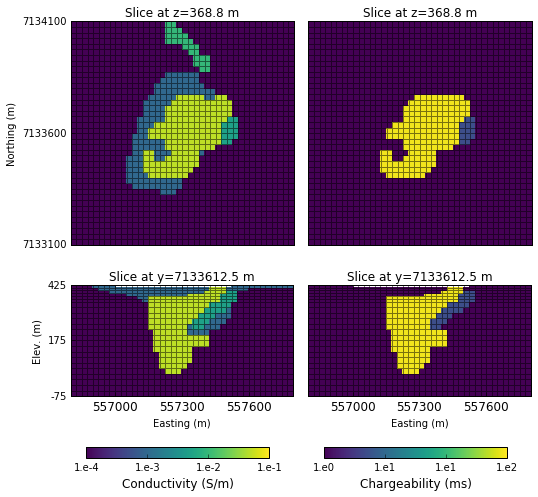

In [9]:
interact(lambda indz,indy: compareTrueModels(indz,indy), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=31))

## Mesh and Chargeability model

## Obtain topographic surface from 3D conductivity model

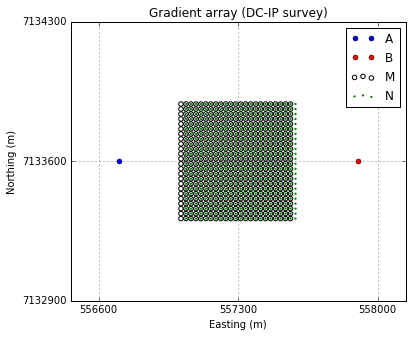

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5*1.2,5))
# dat = mesh2D.plotImage(topoCC,pcolorOpts={"cmap":"binary",'alpha':0.5}, ax=ax)
plt.xlabel("Easting (m)"); plt.ylabel("Northing (m)")
# cb = plt.colorbar(dat[0]); cb.set_label("Elevation (m)")
ax.plot(Aloc1_x[0], Aloc1_x[1], 'bo', ms=5)
ax.plot(Bloc1_x[0], Bloc1_x[1], 'ro', ms=5)
ax.scatter(Mx[:,0], Mx[:,1],s=20, edgecolors="k", facecolors="none")
ax.scatter(Nx[:,0], Nx[:,1],s=5, edgecolors="none", facecolors="g")
ax.legend(("A", "B", "M", "N"), fontsize=12)
xmin, xmax = -700+xc, 700+xc
ymin, ymax = -700+yc, 700+yc
ax.set_xticks(np.linspace(xmin, xmax, 3))
ax.set_yticks(np.linspace(ymin, ymax, 3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.axis('equal')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")  
ax.set_title("Gradient array (DC-IP survey)")
ax.grid(True)
# fig.savefig("./images/GradientArray", dpi=200)

In [12]:
# Load inversion results
IPresults_withdepth = pickle.load(open( "IPresults", "rb" ))
print IPresults_withdepth.keys()

# Get inversion model
etaopt_withdepth = IPresults_withdepth['eta_inv']

# Get predicted data
IPdpred = IPresults_withdepth['IPPred']
IPpreddata = Survey.Data(survey, v=IPdpred)

['IPPred', 'eta_true', 'IPObs', 'eta_inv']


## Use estimated $\sigma (x, y, z)$ to compute sensitivity 

In [13]:
def vizdata(data, src, rx, rxcomponent="X", clim=None, title=None, figsave=None, ax=None, cb=True,cbOrient="vertical"):
    if ax is None:
        fig = plt.figure(figsize=(6.8, 5.5))
        ax = plt.subplot(111)

    temp = data[src, rx]
    if rxcomponent=="X":
        X = Xx.copy()
        Y = Yx.copy()
    else:
        X = Xy.copy()
        Y = Yy.copy()
    temp = temp.reshape(X.shape, order="F")
    if clim is not None:
        vmin, vmax = clim[0], clim[1]
        dat = ax.contourf(X, Y, temp, 20, clim=clim, vmin=vmin, vmax=vmax, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
    else:
        vmin, vmax = temp.min(), temp.max()
        dat = ax.contourf(X, Y, temp, 20, cmap="plasma")
        ax.contour(X, Y, temp, 10, colors="k")
        
    if title is not None:
        ax.set_title(title)
    xmin, xmax = X.min(), X.max()
    ymin, ymax = Y.min(), Y.max()            
    ax.set_xlabel("Easting (m)")
    ax.set_ylabel("Northing (m)")
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax.set_xticks(np.linspace(xmin, xmax, 3))
    ax.set_yticks(np.linspace(ymin, ymax, 3))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)            
    
    if cb:
        cb = plt.colorbar(dat, orientation=cbOrient, ticks=np.linspace(vmin, vmax, 3), format="%.1e")
        cb.set_label("Potential (V)")
        
    if figsave is not None:
        fig.savefig(figsave, dpi=200)
    return ax
    

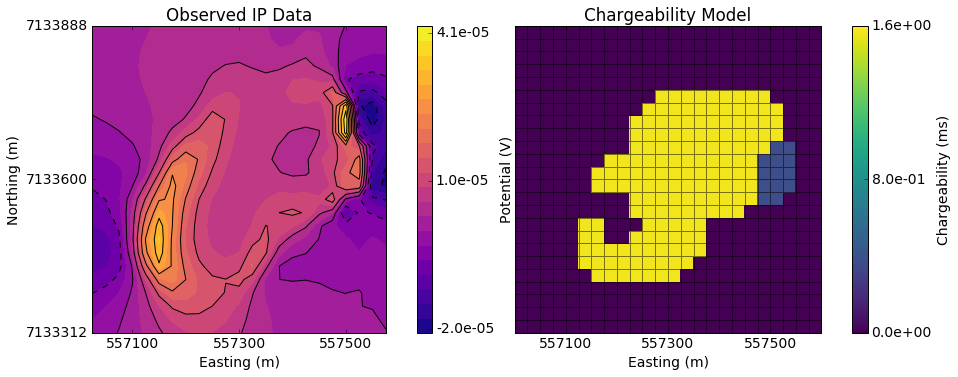

In [14]:
Xx = 0.5*(Mx[:,0]+Nx[:,0]).reshape((23, 24), order="F")
Yx = Mx[:,1].reshape((23, 24), order="F")

fig = plt.figure(figsize(11, 5.5))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28
matplotlib.rcParams['font.size'] = 14
# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# IP observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0, pos.y0,  pos.width*0.5, pos.height])
# ax1 = vizdata(ipdata, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed IP Data", clim=(4.5e-3, 4.8e-1))
ax1 = vizdata(ipdata, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed IP Data")

# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
# ax1.set_xlim(xmin, xmax)
# ax1.set_ylim(ymin, ymax)   
plt.gca().set_aspect('equal')

ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=14)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')

# True Chargeability model
ax2 = fig.add_axes([pos.x0+0.55, pos.y0,  pos.width, pos.height])
ax2,dat2 = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc, yc=yc, zc=zc, ax=ax2, label="Chargeability (ms)", scale="linear", clim=(0, 1.6))
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=14)
ax2.set_xlabel('Easting (m)')
ax2.set_title('Chargeability Model')

# pos =  ax2.get_position()
# # cbarax = fig.add_axes([pos.x0+0.02 , pos.y0-0.01 ,  pos.width*0.05, pos.height])  ## the parameters are the specified position you set
# cb2 = fig.colorbar(dat2[0], orientation="vertical", ax = ax2, ticks=np.linspace(-4, -3, 4), format="1.e%.f")
# cb2.set_label("Chargeability (ms)",size=12)

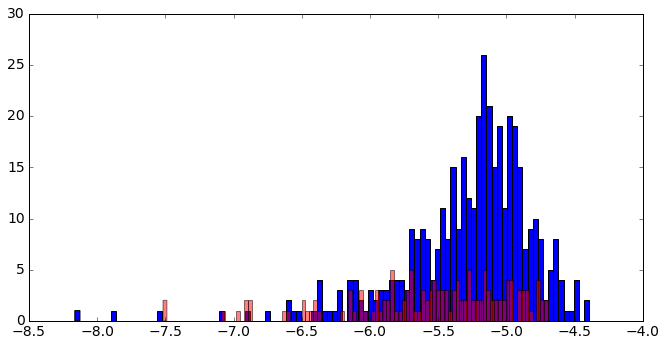

In [15]:
a = hist(np.log10(dataIP[dataIP>0.]), bins=100)
b = hist(np.log10(-dataIP[dataIP<0.]), bins=100, color='r', alpha=0.5)

## Depth weight

In [16]:
depth = 1./(abs(mesh.gridCC[:,2]-zc))**1.5
depth = depth/depth.max()

(-175.0, 425.0)

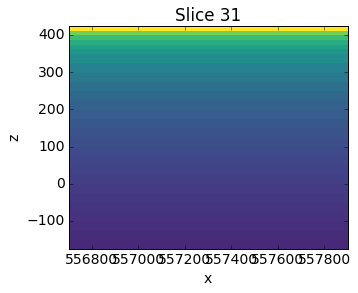

In [17]:
fig, ax = plt.subplots(1,1, figsize=(5,4))
mesh.plotSlice(np.log10(depth), normal="Y", streamOpts={'color':'w'}, ax=ax, pcolorOpts={"cmap":"viridis"})
ax.set_xlim(-600+xc, 600+xc)
ax.set_ylim(-600+zc, 0.+zc)    

## Sensitivity weight?

In [18]:
m0 = np.ones(mesh.nC)[~airind]*1e-20

In [48]:
def matFun(v):
    y = problemIP.Jvec(m0, v, f=f)
    out = problemIP.Jtvec(m0, y, f=f)
    return out

In [64]:
%%time
weight_sense = np.sqrt(abs(Utils.diagEst(matFun, m0.size, approach='Probing', k=50)))

CPU times: user 2min 7s, sys: 9.48 s, total: 2min 16s
Wall time: 41.6 s


## Test diagEst

In [65]:
%%time
# weight_sense_test2 = Utils.diagEst(matFun, m0.size, approach='Probing', k=2)
weight_sense_test2 = np.sqrt(abs(Utils.diagEst(matFun, m0.size, approach='Probing', k=2)))
weight2 = abs(weight_sense_test2) / abs(weight_sense_test2).max()

CPU times: user 5.42 s, sys: 424 ms, total: 5.84 s
Wall time: 1.64 s


In [41]:
# %%time
# weight_sense_test100 = Utils.diagEst(matFun, m0.size, approach='Probing', k=100)

CPU times: user 4min 12s, sys: 17.9 s, total: 4min 30s
Wall time: 1min 20s


In [51]:
# a = hist(np.log10(-weight_sense_test2[weight_sense_test2<0.]), bins=100)
# b = hist(np.log10(-weight_sense_test100[weight_sense_test100<0.]), bins=100, color='r', alpha=0.5)

In [52]:
abs(weight_sense).min()

1.6483960317118511e-05

In [53]:
weight = abs(weight_sense) / abs(weight_sense).max()
print np.log10(weight).min(), np.log10(weight).max()

-3.73556913732 0.0


In [54]:
print weight_sense.min(), weight_sense.max()

1.64839603171e-05 0.0896665990258


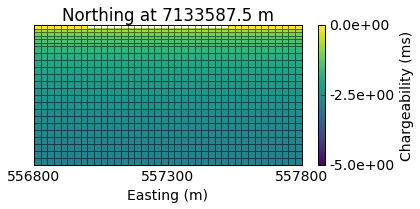

In [55]:
ax,dat = viz(mesh, np.log10(depth), 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

In [83]:
def compareEstSensitivity(sens1,sens2,indz,indy):
    fig = plt.figure(figsize(11, 8))
    vmin, vmax = -5, 0
    xmin, xmax = -500+xc, 500+xc
    ymin, ymax = -500+yc, 500+yc
    zmin, zmax = -500+zc, 0+zc
#     indz = 28
#     indy = 31
    # Axis label
    x = np.linspace(xmin+200, xmax-200,3)
    matplotlib.rcParams['font.size'] = 10

    # Sens1 z-section
    ax1 = plt.subplot(1,1,1)
    pos =  ax1.get_position()
    ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
    ax1,dat1 = viz(mesh, actmapIP*np.log10(sens1), indz, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, ax=ax1, scale="linear", cb=False, clim=(-5, 0.))
    plt.gca().set_aspect('equal')
    ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax1.xaxis.set_visible(False)
    ax1.set_xlim(xmin, xmax)
    ax1.set_ylim(ymin, ymax)    
    ax1.set_ylabel('Northing (m)')

    # Sens1 y-section
    pos =  ax1.get_position()
    ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax2, dat2 = viz(mesh, actmapIP*np.log10(sens1), indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, scale="linear", cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax2.set_xlim(xmin, xmax)
    ax2.set_ylim(zmin, zmax) 
    ax2.set_xticks(map(int, x))
    ax2.set_xticklabels(map(str, map(int, x)),size=12)
    ax2.set_xlabel('Easting (m)')
    ax2.set_ylabel('Elev. (m)')

    # Sens2 z-section
    ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
    ax3,dat3 = ax = viz(mesh, actmapIP*np.log10(sens2), indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, scale="linear", cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
    ax3.xaxis.set_visible(False)
    ax3.yaxis.set_visible(False)
    ax3.set_xlim(xmin, xmax)
    ax3.set_ylim(ymin, ymax)

    # Sens2 y-section
    ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
    ax4, dat4 = viz(mesh, actmapIP*np.log10(sens2), indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, scale="linear", cb=False, clim=(vmin, vmax))
    plt.gca().set_aspect('equal')
    ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
    ax4.yaxis.set_visible(False)
    ax4.set_xlim(xmin, xmax)
    ax4.set_ylim(zmin, zmax) 
    ax4.set_xticks(map(int, x))
    ax4.set_xticklabels(map(str, map(int, x)),size=12)
    ax4.set_xlabel('Easting (m)')

    pos =  ax4.get_position()
    cbarax = fig.add_axes([pos.x0-0.15 , pos.y0-0.01 ,  pos.width, pos.height*0.05])  ## the parameters are the specified position you set
    cb = fig.colorbar(dat4[0],cax=cbarax, orientation="horizontal", ax = ax4, ticks=np.linspace(vmin,vmax, 4), format="1.e%.f")
    cb.set_label("Sensitivity Weight",size=12)

<function __main__.<lambda>>

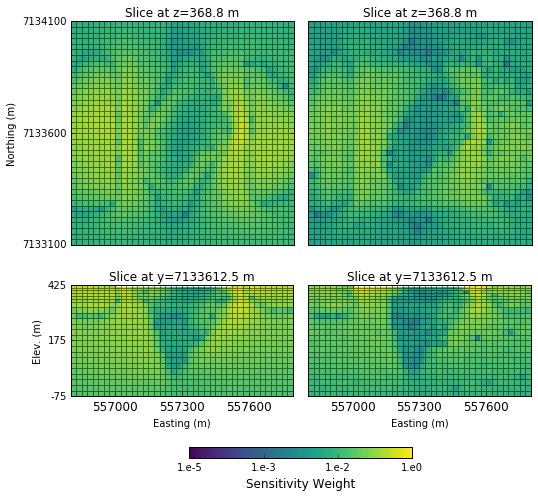

In [84]:
interact(lambda indz,indy: compareEstSensitivity(weight2,weight,indz,indy), indz=IntSlider(min=0, max=mesh.nCz-1,step=1, value=28), indy=IntSlider(min=0, max=mesh.nCy-1,step=1, value=31))

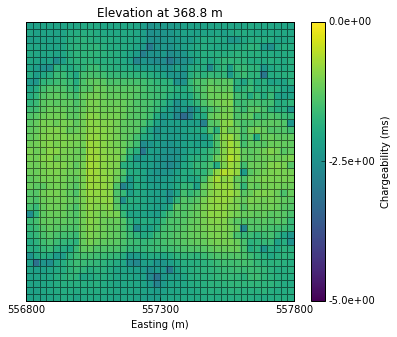

In [135]:
ax,dat = viz(mesh, actmapIP*np.log10(weight), 28, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

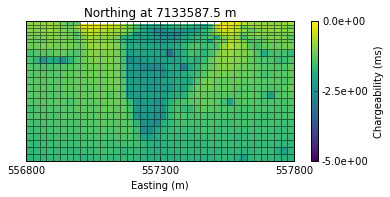

In [86]:
ax,dat = viz(mesh, actmapIP*np.log10(weight), 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(-5, 0.), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

In [120]:
# from SimPEG import DataMisfit, Regularization, Optimization, Directives, InvProblem, Inversion
# std = 0.
# eps = abs(dataIP).max()*0.01
# surveyIP.std = std
# surveyIP.eps = eps
# m0 = np.ones(mesh.nC)[~airind]*1e-20
# regmap = Maps.IdentityMap(nP=m0.size)
# #TODO put warning when dobs is not set!
# surveyIP.dobs = dataIP
# dmisfit = DataMisfit.l2_DataMisfit(surveyIP)
# reg = Regularization.Simple(mesh, mapping=regmap, indActive=~airind)
# # reg.wght = depth[~airind]
# reg.wght = weight2
# opt = Optimization.ProjectedGNCG(maxIter = 15)
# opt.lower = 0.
# invProb = InvProblem.BaseInvProblem(dmisfit, reg, opt)
# # Create an inversion object
# beta = Directives.BetaSchedule(coolingFactor=5, coolingRate=3)
# betaest = Directives.BetaEstimate_ByEig(beta0_ratio=1.)
# save = Directives.SaveOutputEveryIteration()
# target = Directives.TargetMisfit()
# # beta.beta = 10.
# savemodel = Directives.SaveModelEveryIteration()
# inv = Inversion.BaseInversion(invProb, directiveList=[betaest, beta, save, target, savemodel])
# reg.alpha_s = 1e-1
# reg.alpha_x = 1.
# reg.alpha_y = 1.
# reg.alpha_z = 1.
# problemIP.counter = opt.counter = Utils.Counter()
# opt.LSshorten = 0.5
# opt.remember('xc')
# mIPopt = inv.run(m0)
# # problemIP.Ainv.clean()

SimPEG.InvProblem will set Regularization.mref to m0.
SimPEG.InvProblem is setting bfgsH0 to the inverse of the eval2Deriv.
                    ***Done using same Solver and solverOpts as the problem***
SimPEG.SaveOutputEveryIteration will save your inversion progress as: '###-InversionModel-2016-07-16-17-03.txt'
SimPEG.SaveModelEveryIteration will save your models as: '###-InversionModel-2016-07-16-17-03.npy'
=============================== Projected GNCG ===============================
  #     beta     phi_d     phi_m       f      |proj(x-g)-x|  LS    Comment   
-----------------------------------------------------------------------------
   0  3.42e+08  1.54e+05  0.00e+00  1.54e+05    5.07e+07      0              
   1  3.42e+08  7.81e+04  5.31e-06  7.99e+04    4.32e+07      0              
   2  3.42e+08  2.14e+04  2.99e-05  3.16e+04    1.57e+07      0   Skip BFGS  
   3  6.83e+07  1.58e+04  3.06e-05  1.79e+04    6.00e+06      0   Skip BFGS  
   4  6.83e+07  1.01e+04  4.87e-05  1.3

In [121]:
# XC = opt.recall('xc')

In [122]:
# dmisfit.eval(mIPopt)

In [136]:
import pickle
eta_pred = actmapIP*mIPopt
Results = {"model_true":eta, "model_pred":eta_pred, "Obs":surveyIP.dobs, "Pred":invProb.dpred}
outputs = open("IPresults_new", 'wb')
pickle.dump(Results, outputs)
outputs.close()

IPresults = pickle.load(open("IPresults_new","rb"))

dobs = IPresults["Obs"]
dpred = IPresults["Pred"]
eta = IPresults["model_true"]
eta_pred = IPresults["model_pred"]


In [137]:
# dpred = invProb.dpred
# dobs = surveyIP.dobs

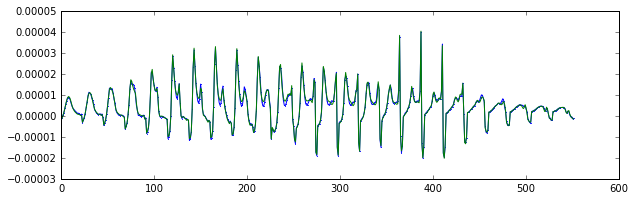

In [138]:
figsize(10, 3)
plt.plot(dpred, '.-', ms=1)
plt.plot(dobs)

In [139]:
ippred = Survey.Data(surveyIP, v=dpred)
ipobs = Survey.Data(surveyIP, v=dobs)

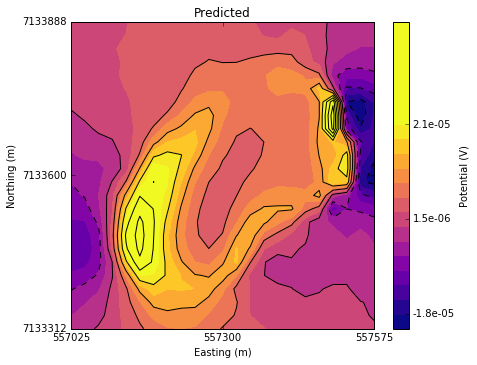

In [140]:
vizdata(ippred, src1, rx_x, title="Predicted", clim=(-1.8e-5, 2.1e-5))

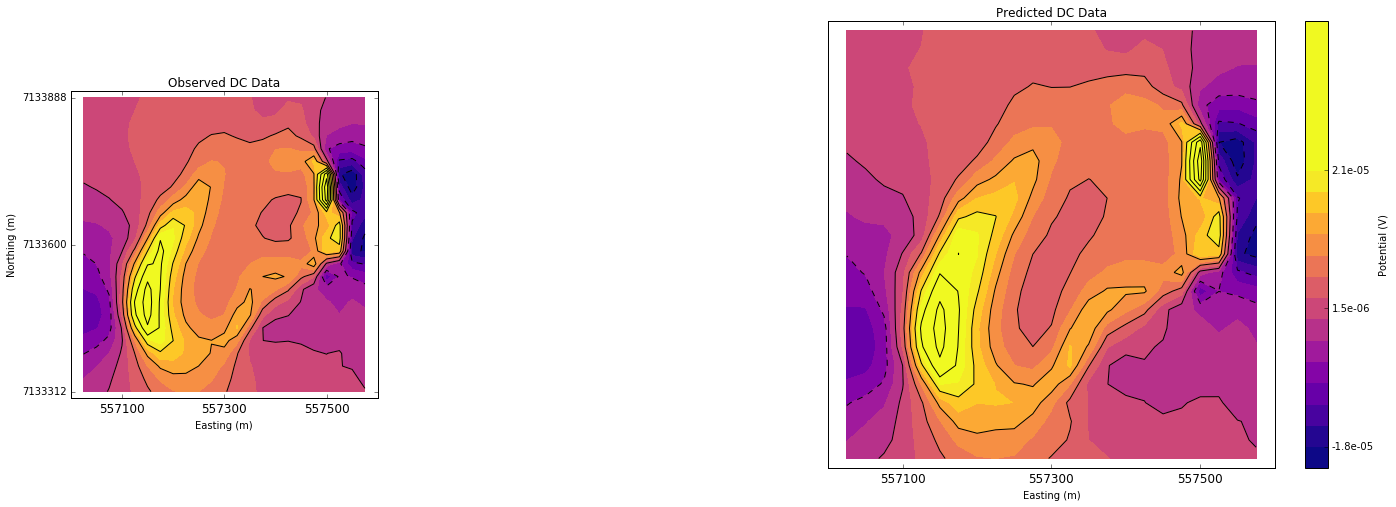

In [141]:
fig = plt.figure(figsize(11, 8))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28

# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# DC observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0,  pos.width*0.5, pos.height])
ax1 = vizdata(ipobs, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed DC Data", clim=(-1.8e-5, 2.1e-5), cb=False)
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=12)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set

# DC Predicted data
ax2 = fig.add_axes([pos.x0+0.8, pos.y0,  pos.width, pos.height])
ax2 = vizdata(ippred, src1, rx_x, ax=ax2, rxcomponent="X", title="Predicted DC Data", clim=(-1.8e-5, 2.1e-5))
plt.gca().set_aspect('equal')
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')

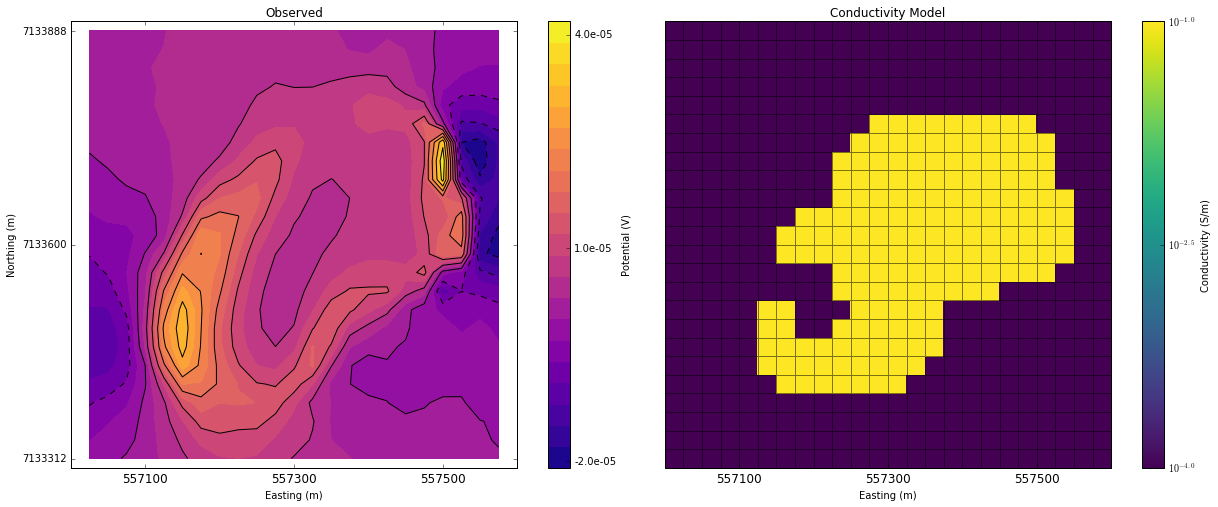

In [143]:
fig = plt.figure(figsize(11, 8))
xmin, xmax = -300+xc, 300+xc
ymin, ymax = -300+yc, 300+yc
indz = 28

# Axis label
x = np.linspace(xmin+100, xmax-100,3)

# IP observed data
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0,  pos.width*0.45, pos.height])
ax1 = vizdata(ippred, src1, rx_x, ax=ax1, rxcomponent="X", title="Observed")
plt.gca().set_aspect('equal')
# ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
# ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)   
ax1.set_xticks(map(int, x))
ax1.set_xticklabels(map(str, map(int, x)),size=12)
ax1.set_xlabel('Easting (m)')
ax1.set_ylabel('Northing (m)')
ax1.set

# True chargeability model
ax2 = fig.add_axes([pos.x0+0.75, pos.y0,  pos.width, pos.height])
ax2,dat2 = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc, yc=yc, zc=zc, ax=ax2)
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax2.yaxis.set_visible(False)
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(ymin, ymax)
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')
ax2.set_title('Conductivity Model')

In [144]:
from ipywidgets import interact, IntSlider

In [147]:
iteration = 15
eta_pred = actmapIP*mIPopt

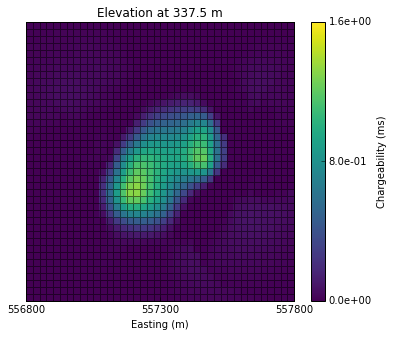

In [148]:
ax,dat = viz(mesh, eta_pred*1e3, 26, airind=airind, normal="Z", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')

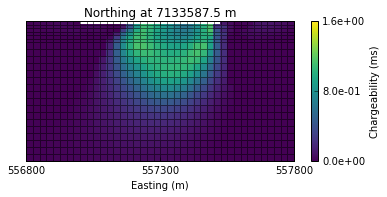

In [149]:
ax,dat = viz(mesh, eta_pred*1e3, 30, airind=airind, normal="Y", xc=xc, yc=yc, zc=zc, scale="linear", clim=(0, 1.6), label="Chargeability (ms)")
ax.set_yticks([]); ax.set_ylabel('')


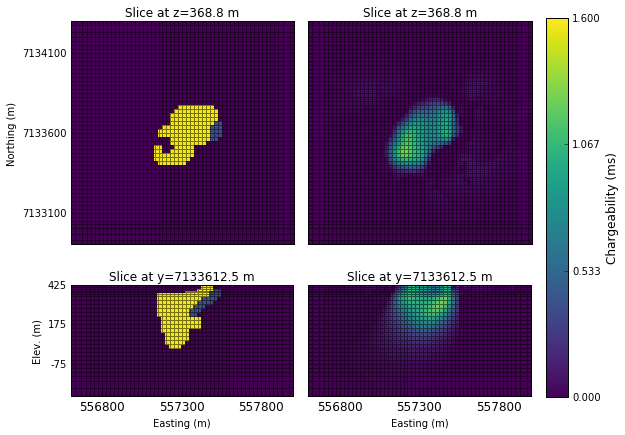

In [150]:
fig = plt.figure(figsize(11, 8))
sig_min, sig_max = 0., 1.6
xmin, xmax = -700+xc, 700+xc
ymin, ymax = -700+yc, 700+yc
zmin, zmax = -700+zc, 0+zc
indz = 28
indy = 31
# Axis label
x = np.linspace(xmin+200, xmax-200,3)

# True Chargeability Model z-section
ax1 = plt.subplot(1,1,1)
pos =  ax1.get_position()
ax1.set_position([pos.x0-0.1, pos.y0+0.3,  pos.width*0.5, pos.height*0.5])
ax1,dat1 = viz(mesh, eta*1e3, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax1, scale="linear", cb=False, clim=(sig_min, sig_max))
plt.gca().set_aspect('equal')
ax1.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax1.xaxis.set_visible(False)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)    
ax1.set_ylabel('Northing (m)')

# True Chargeability Model y-section
pos =  ax1.get_position()
ax2 = fig.add_axes([pos.x0+0.0525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
ax2, dat2 = viz(mesh, eta*1e3, indy, airind, normal="Y", xc=xc,yc=yc,zc=zc, ax=ax2, scale="linear", cb=False, clim=(sig_min, sig_max))
plt.gca().set_aspect('equal')
ax2.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
ax2.set_xlim(xmin, xmax)
ax2.set_ylim(zmin, zmax) 
ax2.set_xticks(map(int, x))
ax2.set_xticklabels(map(str, map(int, x)),size=12)
ax2.set_xlabel('Easting (m)')
ax2.set_ylabel('Elev. (m)')

# IP Recovered Model z-section
ax3 = fig.add_axes([pos.x0+0.3, pos.y0,  pos.width, pos.height])
ax3,dat3 = ax = viz(mesh, eta_pred*1e3, indz, airind, normal="Z", xc=xc,yc=yc,zc=zc, ax=ax3, scale="linear", cb=False, clim=(sig_min, sig_max))
plt.gca().set_aspect('equal')
ax3.set_title(("Slice at z=%.1f m")%(mesh.vectorCCz[indz]))
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
ax3.set_xlim(xmin, xmax)
ax3.set_ylim(ymin, ymax)

# IP Recovered Model y-section
ax4 = fig.add_axes([pos.x0+0.3525, pos.y0 - 0.36,  pos.width*0.725, pos.height])
ax4, dat4 = viz(mesh, eta_pred*1e3, indy, airind,  normal="Y", xc=xc,yc=yc,zc=zc, ax=ax4, scale="linear", cb=False, clim=(sig_min, sig_max))
plt.gca().set_aspect('equal')
ax4.set_title(("Slice at y=%.1f m")%(mesh.vectorCCy[indy]))
ax4.yaxis.set_visible(False)
ax4.set_xlim(xmin, xmax)
ax4.set_ylim(zmin, zmax) 
ax4.set_xticks(map(int, x))
ax4.set_xticklabels(map(str, map(int, x)),size=12)
ax4.set_xlabel('Easting (m)')

pos =  ax4.get_position()
cbarax = fig.add_axes([pos.x0+0.3 , pos.y0+0.095 ,  pos.width*0.1, pos.height*1.7])  ## the parameters are the specified position you set
cb = fig.colorbar(dat[0],cax=cbarax, orientation="vertical", ax = ax4, ticks=np.linspace(sig_min,sig_max, 4))

cb.set_label("Chargeability (ms)",size=12)
# fig.savefig('MAG_RecModel.png',dpi = 200)
